<p style="text-align: center;"><font size="8"><b>More Matplolib</b></font><br>

Last week we saw how to make basic plots using Matplotlib.

Using Matplotlib we can do much more than just basic plots as we will see today.

# Log scale plots

Sometimes we have data which covers a very wide range. For example we might have the data:

    [0.1, 0.2, 0.4, 0.000004, 0.0000005, 1, 10, 1000000, 0.00005]

We can of course plot this on a regular plot.

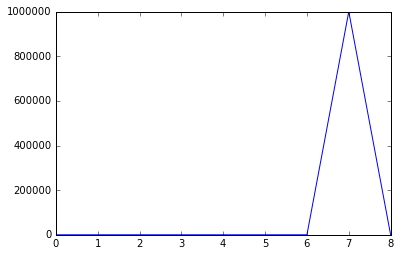

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([0.1, 0.2, 0.4, 0.000004, 0.0000005, 1, 10, 1000000, 0.00005])

This plot is not very easy to read. It is impossible to tell for example if the first data point is larger or smaller than the second.

Instead of plotting the values of the data, we could plot their logarithms using the command `semilogy`.

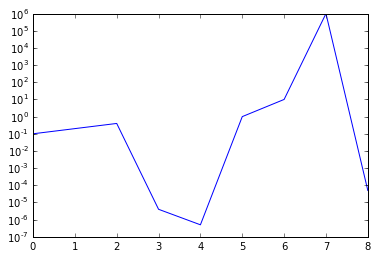

In [6]:
plt.semilogy([0.1, 0.2, 0.4, 0.000004, 0.0000005, 1, 10, 1000000, 0.00005])

You'll notice that now the $y$ axis goes from $10^{-7}$ to $10^6$. Each tic represents a 10 fold increase over the previous tic. Using this plot it is easy to see that the first data point is in fact smaller than the second. 

Here the $y$ data ranged from $10^{-7}$ to $10^6$. Implicitly the $x$ data ranged from 0 to 8. Sometimes we may have the opposite situation, where the $x$ data has a large range, but the $y$ data does not. In this case we can use the `semilogx` command.

Other times we may have both the $x$ and $y$ data covering large ranges. In that case we can make both axes log axes by using the `loglog` command.

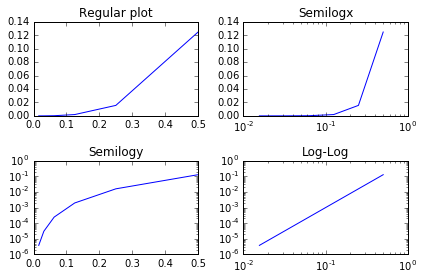

In [9]:
import numpy as np
x = np.array([1/2, 1/4, 1/8, 1/16, 1/32, 1/64])
y = x**3
plt.subplot(2,2,1)
plt.title("Regular plot")
plt.plot(x,y)
plt.subplot(2,2,2)
plt.title("Semilogx")
plt.semilogx(x,y)
plt.subplot(2,2,3)
plt.title("Semilogy")
plt.semilogy(x,y)
plt.subplot(2,2,4)
plt.title("Log-Log")
plt.loglog(x,y)
plt.tight_layout()

## Exercise

Plot the day length in hours of all 8 planets in our solar system. Use a subplot. Make the top plot a regular plot and the bottom plot a log plot.

In [15]:
day_length = [1408, 5832, 24, 25, 10, 11, 17, 16]

# Contour plots

We often need to plot functions in more than one dimension. One way to visualize functions defined on a 2D region is through contour plots.

![contour map](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter3/images/contour_map.gif?raw=true)

Here each line represents a line of constant temperature.

Suppose we are given the function 

$$ z(x,y) = \sin(x)\cos^2(y).$$

What does this function look like? 

We can use the contour command to create a contour plot. To do this, we will need the following:
* a collections of x and y values
* a collection of a single z value for each (x,y) pair

This is annalagous to the 1D case where we used linspace to sample the interval and evaluated the function at every sample point.

So we have to create a collection of points in the $x-y$ plane. 

We can do this by using a numpy command called `meshgrid`. Meshgrid takes in two 1D arrays and returns two 2D arrays that contain the possible pairs of points in the two 1D arrays.

For example, if we pass in the arrays $x = [1,2,3]$ and $y = [4,5,6,7]$, we would get the arrays

$$X = \begin{bmatrix} 1 & 2 & 3\\1 & 2 & 3\\ 1 & 2 & 3\\ 1 & 2 & 3\end{bmatrix},$$

$$Y = \begin{bmatrix} 4 & 4 & 4\\ 5& 5& 5\\6 & 6 & 6\\7 & 7& 7\end{bmatrix}.$$

![meshgrid](https://github.com/lukasbystricky/ISC-3313/blob/master/lectures/chapter3/images/meshgrid.jpg?raw=true)

## Exercise

Suppose we want to sample a function $x$ and $y$ on the domain $-1\leq x \leq 1$, $0\leq y\leq 2$ using 100 points. Using linspace and meshgrid Write a code fragment to create and plot these points.

Once we have these points, the command `contour` creates the contour plot.

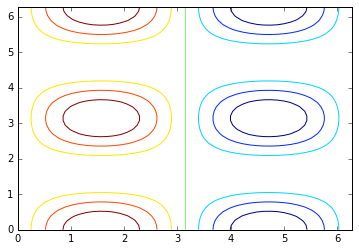

In [68]:
x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

plt.contour(X,Y,np.sin(X)*np.cos(Y)**2)

The contour command takes in at least three arguments. An array of $x$ coordinates, an array of $y$ coordinates and an array of $z$ coordinates. It can also take in an optional fourth argument - the number of contours. The default is 8.

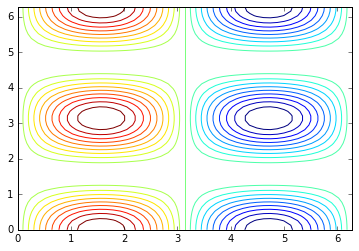

In [71]:
x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

plt.contour(X,Y,np.sin(X)*np.cos(Y)**2, 20)

We can spruce up this plot by adding color labels. To do this we must store a contour set object created by the contour command. The command `clabel` takes in this color structure and creates the contour labels.

<a list of 20 text.Text objects>

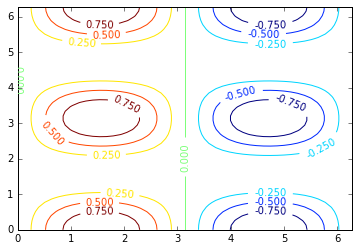

In [66]:
x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

CS = plt.contour(X,Y,np.sin(X)*np.cos(Y)**2)
plt.clabel(CS)

We may want to fill in the contour plot. We can do this using the command `contourf`.

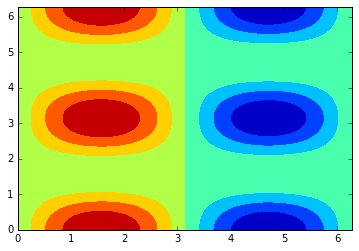

In [67]:
x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

CS = plt.contourf(X,Y,np.sin(X)*np.cos(Y)**2)

The command `colorbar` adds a color bar to the plot based on a contour set object. We can combine `contour` and `contourf` to draw the contour boundaries and label each contour.

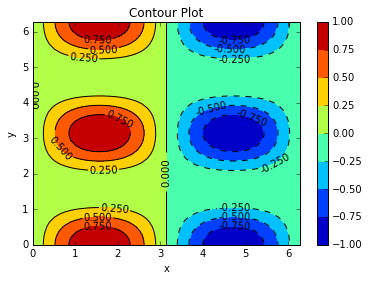

In [72]:
x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

CS = plt.contourf(X,Y,np.sin(X)*np.cos(Y)**2)
CS1 = plt.contour(X,Y,np.sin(X)*np.cos(Y)**2, colors="k") # make all contour labels black
plt.clabel(CS1) # CS1 is the contour set from contour
plt.colorbar(CS) # CS is the contour set from contourf

# of course you can add axis labels and titles too
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contour Plot")

## Exercise

Create a contour plot of the function $z =x\sin(y)$ over the interval $-5\leq x\leq 5$, $-5\leq y\leq 5$.

# 3D plots

Sometimes we'll want to visualize functions in 3D. Matlplotlib comes with the mpl_toolkits module that contains methods to do this.

## Parametric plots

Consider the parametric function:
$$\begin{align*} 
    x(t) &= \cos(t)\\
    y(t) &= \sin(t)\\
    z(t) &= t
\end{align*}$$

We'd like to plot this function from $t = 0$ to $t=10\pi$.

The first step is to import the Axes3D function from mpl_toolkits.mplot3d.

In [73]:
from mpl_toolkits.mplot3d import Axes3D

Next we have to create a 3D figure. 

matplotlib.axes._subplots.Axes3DSubplot

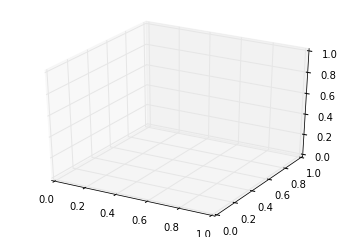

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
type(ax)

The variable `ax` is a 3D axis. The plt.plot command creates a new axis and plots in it. Instead we will specify to Python that we want to plot to the axis `ax.

The actual plotting is done in more or less the same way as the in the 1D case. We use linspace to sample $t$ over the desired range, and then compute $x$, $y$ and $z$. The plot command plots those values for us on the 3D axis. 

To set the title and axis labels for a specific axis we use the commands `set_title`, `set_xlabel`, `set_ylabel` and `set_zlabel`. 

In the interactive session or in scripts after calling `plt.show()` you will be able to rotate and move this plot around.

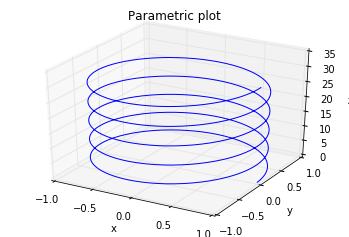

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t = np.linspace(0,10*np.pi,1000)
x = np.cos(t)
y = np.sin(t)
z = t
ax.plot(x, y, z)
ax.set_title("Parametric plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## Exercise

Plot the parametric curve
$$\begin{align*} 
    x(t) &= \cos(t)\\
    y(t) &= \sin(t)\\
    z(t) &= \sin(t)
\end{align*}$$
from $t=0$ to $t=2\pi$.

## Surface plots

The final plot we will look at today is the surace plot. We saw earlier how contour plots are used to visualize functions defined over a 2D range. Surface plots are used to view functions like this in 3D.


We define the 3D axis as we did for the parametric plot. The data is defined exactly as with the contour plot. We use linspace to generate the $x$ and $y$ ranges, and meshgrid to create the grid of points.

The command `plot_surface` creates the surface plot.

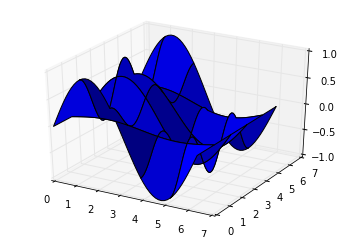

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

ax.plot_surface(X, Y, np.sin(X)*np.cos(Y)**2)

Again in the interactive session, or in a script you can move or rotate this plot around. 

You'll notice the the color is blue. You can change the color by passing in the color flag. Again titles and axis labels can be set as in the parametric curve case.

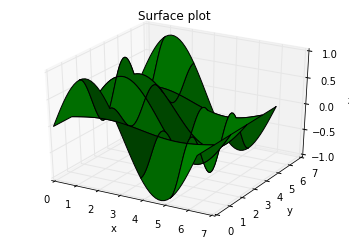

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

ax.plot_surface(X, Y, np.sin(X)*np.cos(Y)**2, color='g')
ax.set_title("Surface plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

More interestingly, you can make the color depend on the value of the function (like the contour plot). To do this you will have to import the colormap submodule from matplotlib.

In [106]:
from matplotlib import cm

You can then pass in a colormap to the `plot_surface` command.

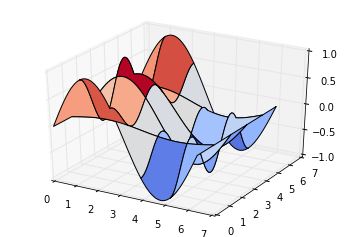

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,2*np.pi)
y = np.linspace(0,2*np.pi)

X,Y = np.meshgrid(x,y)

ax.plot_surface(X, Y, np.sin(X)*np.cos(Y)**2, cmap=cm.coolwarm)

There are dozens of possible colormaps. A complete list is available [here](https://matplotlib.org/examples/color/colormaps_reference.html).

## Exercise

Create a surface plot of the function $z =x\sin(y)$ over the interval $-5\leq x\leq 5$, $-5\leq y\leq 5$. Add a colormap of your choice.